<a href="https://colab.research.google.com/github/HariPrasad6221/DDP/blob/main/XGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_excel('Data_Approximate.xlsx')
x = dataset.iloc[:,2:7].values
y = dataset.iloc[:,10].values

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[1])], remainder = 'passthrough')
x= np.array(ct.fit_transform(x))

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import time
from sklearn import tree
begin = time.time()
model = XGBRegressor()
model.fit(x_train,y_train) # for force predictions
end = time.time()
y_f = model.predict(x_test)
print(f'Run Time: {(end-begin)*1000} ms')
print(r2_score(y_test,y_f));

[05:42:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Run Time: 24.224281311035156 ms
0.9352356322620575


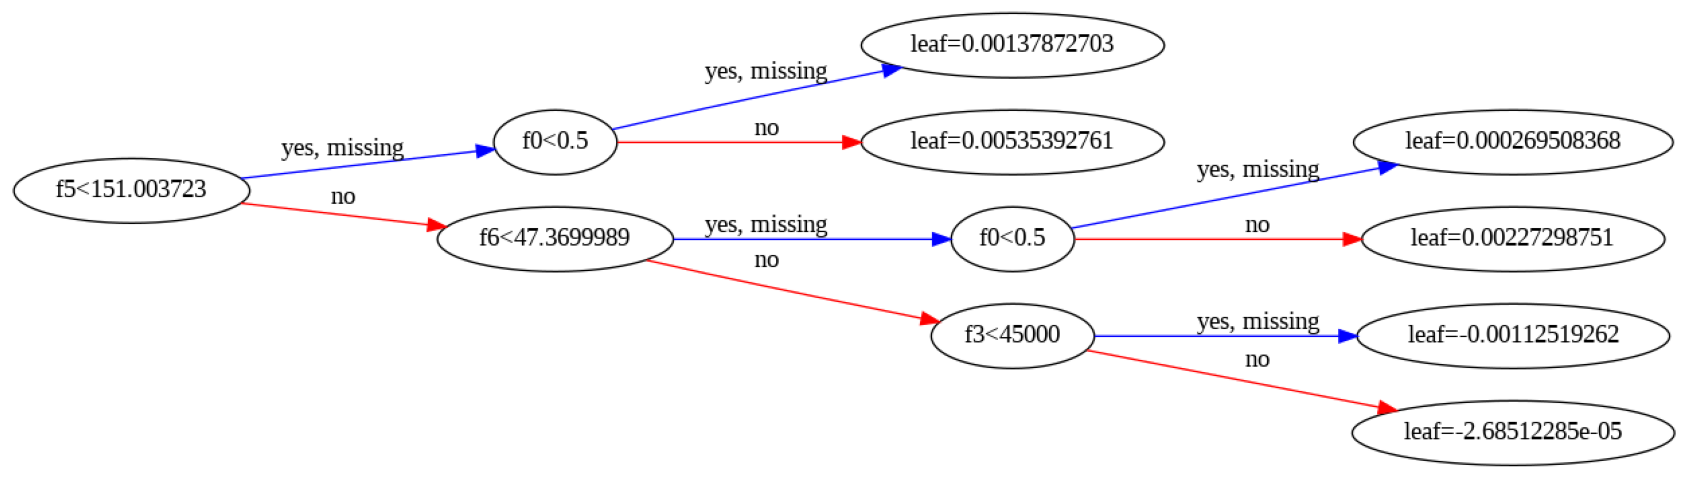

100


In [ ]:
from xgboost import XGBRegressor, plot_tree
fig, ax = plt.subplots(figsize=(30, 30))
#plot_tree(r_f, num_trees = 0)
#plot_tree(r_f, num_trees=20); plt.show()
plot_tree(model, num_trees=99, rankdir='LR', ax=ax);
plt.show()
dump_list = model.get_booster().get_dump()
num_trees = len(dump_list)
print(num_trees)